# Deep Learning Computation using MNIST dataset

In [1]:
#Importing tensorflow
import tensorflow as tf

In [2]:
#Check the version of the tensorflow installed 
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras we are importing the required layers 

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential  #importing sequential layer 
from tensorflow.keras.layers import Dense  #importing the dense layer 

from tensorflow.keras.layers import BatchNormalization


In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [5]:
xtrain.shape

(60000, 28, 28)

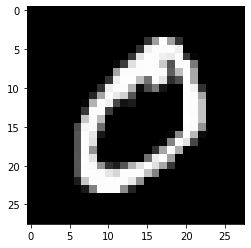

In [6]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [7]:
ytrain[1]

0

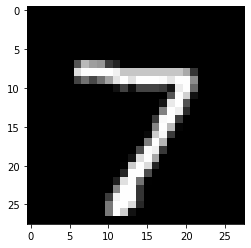

In [8]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [9]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [10]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [11]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [12]:
x_test.shape

(10000, 784)

In [13]:
x_train/=255
x_test/=255

In [14]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [15]:
# Initialize the constructor

model = Sequential()

# Define model architecture
#Dense layers are used in this architecture in a sequential manner

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
epochs = 20
batch_size = 512


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 8s 157us/sample - loss: 0.3658 - accuracy: 0.8990 - val_loss: 0.1336 - val_accuracy: 0.9630
Epoch 2/20
54000/54000 [==============================] - 6s 109us/sample - loss: 0.1293 - accuracy: 0.9620 - val_loss: 0.0913 - val_accuracy: 0.9742
Epoch 3/20
54000/54000 [==============================] - 6s 109us/sample - loss: 0.0830 - accuracy: 0.9759 - val_loss: 0.0823 - val_accuracy: 0.9775
Epoch 4/20
54000/54000 [==============================] - 6s 108us/sample - loss: 0.0569 - accuracy: 0.9834 - val_loss: 0.0814 - val_accuracy: 0.9758
Epoch 5/20
54000/54000 [==============================] - 6s 109us/sample - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.0703 - val_accuracy: 0.9793
Epoch 6/20
54000/54000 [==============================] - 6s 114us/sample - loss: 0.0312 - accuracy: 0.9917 - val_loss: 0.0670 - val_accuracy: 0.9812
Epoch 7/20
54000/54000 [===========================

[0.963, 0.9741667, 0.9775, 0.97583336, 0.97933334, 0.98116666, 0.9798333, 0.9813333, 0.9813333, 0.98333335, 0.9835, 0.9835, 0.98333335, 0.9841667, 0.984, 0.98466665, 0.98483336, 0.985, 0.98516667, 0.98433334]
[0.898963, 0.96196294, 0.9758889, 0.9834074, 0.98766667, 0.9916667, 0.99396294, 0.99583334, 0.997463, 0.99837035, 0.99916667, 0.99935186, 0.9997407, 0.99990743, 0.99998146, 0.99998146, 1.0, 1.0, 1.0, 1.0]


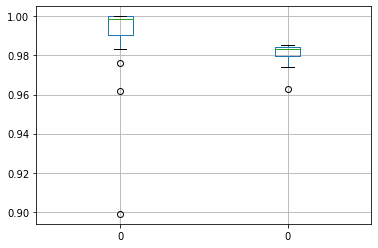

In [18]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [19]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.983
Loss: 0.069


In [20]:
y_predict = model.predict(x_test)

In [21]:
y_predict[0]

array([1.1531187e-10, 1.0339329e-10, 9.5322195e-10, 3.4682409e-06,
       1.7068695e-14, 1.4741786e-09, 9.1904901e-17, 9.9999630e-01,
       6.2887340e-09, 2.0655480e-07], dtype=float32)

In [22]:
np.argmax(y_predict[0])

7

In [23]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 972    1    1    0    1    0    2    1    2    0]
 [   0 1125    4    0    0    1    2    1    2    0]
 [   2    2 1013    2    1    0    2    4    5    1]
 [   0    0    3  994    0    4    0    2    4    3]
 [   0    0    2    1  967    0    4    1    1    6]
 [   2    0    0    6    1  873    5    1    2    2]
 [   2    2    1    1    6    3  943    0    0    0]
 [   1    4   10    3    0    0    0 1005    1    4]
 [   4    0    3    5    3    2    4    2  948    3]
 [   1    3    0    3    3    2    2    3    1  991]]


In [24]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

